In [1]:
using Distributions, TimeIt, ProgressMeter, PyPlot, JLD
include("/home/postdoc/dsen/Desktop/codes/G-ZZ_clean/jl_files/zz_samplers.jl")
include("temp.jl")

run_sampler (generic function with 4 methods)

In [2]:
X, y = load("shrinkage_data_3.jld", "X", "y")
d, Nobs = size(X)
σ02 = 1
my_pr = SS_prior(d, σ02)
my_ll = ll_logistic_sp(X,y)
my_model = model(my_ll, my_pr);

### GZZ:

In [8]:
# Sub-sampling without control variates and with weights:
mb_size = 1
max_attempts = 1.5*10^7
lambda = 2e1
Print = true;

In [9]:
start = time()
run_sampler(my_model, lambda, max_attempts, mb_size, Print) 
print("Sampling in ", round((time()-start)/60,1), " mins \n")

10 percent attempts in 20.03 min; zz bounces = 253370, hyp bounces = 3424, total time of process = 166.104 
20 percent attempts in 40.71 min; zz bounces = 506587, hyp bounces = 6777, total time of process = 332.290 
30 percent attempts in 63.59 min; zz bounces = 756102, hyp bounces = 10209, total time of process = 498.474 
40 percent attempts in 88.38 min; zz bounces = 1006854, hyp bounces = 13477, total time of process = 664.629 
50 percent attempts in 113.38 min; zz bounces = 1252173, hyp bounces = 16809, total time of process = 831.282 
60 percent attempts in 140.21 min; zz bounces = 1499816, hyp bounces = 20174, total time of process = 997.483 
70 percent attempts in 167.93 min; zz bounces = 1742903, hyp bounces = 23548, total time of process = 1164.088 
80 percent attempts in 198.02 min; zz bounces = 1995584, hyp bounces = 26884, total time of process = 1330.148 
90 percent attempts in 229.19 min; zz bounces = 2247521, hyp bounces = 30130, total time of process = 1496.116 
100 per

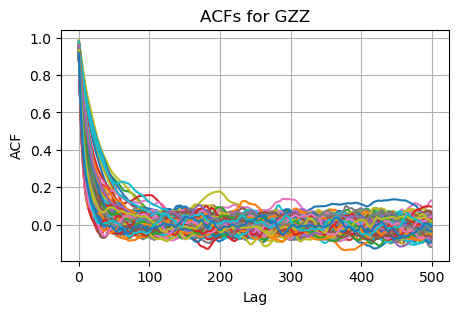

In [11]:
fig = figure("pyplot_barplot",figsize=(5,3))
n_samples = 10^4
maxlag_gzz = 500
acfs_gzz = zeros(d,maxlag_gzz)
discard = 0
filename  = "/xtmp/GZZ_data/shrinkage_prior/synthetic_data/lambda:"*string(lambda)*
            "-d:"*string(d)*"-Nobs:"*string(Nobs)*"-mb_size:"*string(mb_size)*".jld"
xt_skel, bt_skel = load(filename, "xt_skeleton", "bt_skeleton")
xi_samples_gzz = extract_samples(xt_skel[:,discard+1:end], 
                             bt_skel[:,discard+1:end], 
                            (bt_skel[end]-bt_skel[discard+1])/n_samples,
                            "linear")[:,1:end-1]
iacts_gzz = zeros(size(xi_samples_gzz,1))
for dim in 1:size(xi_samples_gzz,1)
    a = acf(xi_samples_gzz[dim,:],maxlag_gzz)
    plot(a)
    acfs_gzz[dim,:] = a
end
title("ACFs for GZZ")
xlabel("Lag")
ylabel("ACF")
grid(true)
xt_skel, bt_skel, xi_samples = [], [], []
gc()